# MPA-MLF, Lab 2 - Clustering and K-means

## What is Clustering?

Clustering is an unsupervised machine learning technique used to group similar data points together. The goal of clustering is to find hidden patterns or structures in the data without requiring predefined labels. It is widely used in various applications such as customer segmentation, image compression, anomaly detection, and document classification.

## K-means

K-means is one of the most popular unsupervised machine learning and clustering algorithms and is well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc. 

Advantages:
 - Simple and fast for large datasets
 - Works well with well-separated clusters

Challenges:
 - Requires specifying *K* in advance
 - Sensitive to initial centroid selection
 - Assumes spherical clusters (does not work well for non-convex shapes)

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example: 
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the centre of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

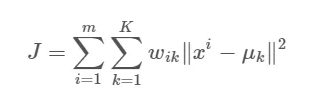

Where: 
   - *k* represents the number of clusters (groups)
   - *m* represents the number of points
   - *u_k* represents centroids
   - *x_i* represents data point
   - *w_ik* represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. assign data points to the closest centroids
  5. calculate objective function
  6. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


Tips: 
- Avoid using loops; if it is unnecessary, instead of using loops, use NumPy functions. There is a list of NumPy functions that you might find helpful:
    - np.argmin()
    - np.where()
    - np.transpose()
    - np.random.permutation()
    - np.random.schuffle()
    - np.linalg.norm()
    - np.arange()
    - np.split()
    - np.random.choice()



- Since the initial clusters are selected randomly, the algorithm can lead to different results each time it runs. Running the algorithm multiple times and determining the result with the lowest objective function helps obtain the best results.


### Code

**Please note that the code structure provided below is only a recommendation. If you prefer, you can use your code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach**

In [39]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Load dataset

Use the following code to load data

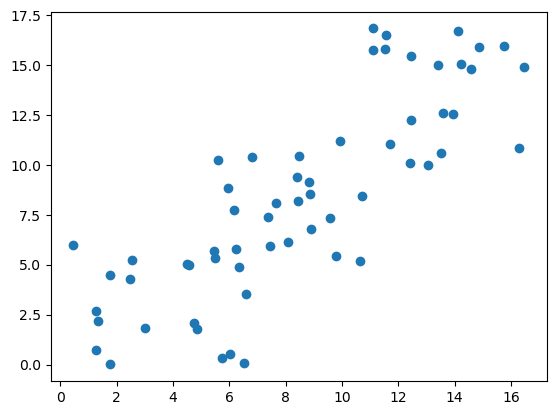

In [40]:
loaded_points = np.load('Data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

### 1. Specify number of clusters *K*

In [41]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k_clusters* points as initial centroids

In [42]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)
    
    :param k_clusters: The number of clusters to form
    :type k_clusters: int 


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :
    
    """
    
    ###################################
    # Write your own code here #
    # Create a copy of points to avoid modifying original data
    points_copy = points.copy()
    
    # Randomly shuffle the points
    np.random.shuffle(points_copy)
    
    # Take first k points as initial centroids
    initial_clusters = points_copy[:k_clusters]
    

    ###################################
    
    return initial_clusters

In [43]:
# Initialize clusters
ini_clusters = initialize_clusters(loaded_points, k)
print("Initial centroids:")
print(ini_clusters)


Initial centroids:
[[ 8.38223854  9.39009357]
 [ 6.00496171  0.55857805]
 [11.57466635 16.52597117]]


### 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [44]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)
    
    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #
    diff = points - centroid
    distances_array = np.sqrt(np.sum(diff**2, axis=1))    

    ###################################
    
    return distances_array

In [45]:
print(calculate_metric(loaded_points, ini_clusters[2]))

[16.19812775 13.89814844 12.4328944  12.73603755 12.75824269 15.319468
 15.95935651 13.49495223 14.43767298 18.86424784 19.2072626  17.19993597
 16.98477517 17.18578215 17.2427595  17.61519163 15.23891186 15.52104737
 16.91092111 13.49786152  7.81743849 10.07900748  7.75857134  8.65052258
  9.37459911  7.84944203 10.32469942  8.1256252   9.29267261  8.90329153
 11.37185967  5.56821752 11.23498492 11.98050053 11.38363176 10.11058664
  9.50738835  6.80266971  8.43814887 10.94414115  0.          5.15263906
  1.37165228  2.37786579  4.4251332   2.56339423  4.62268115  4.3593546
  6.23656815  6.47217718  6.66818052  3.02408259  3.45961905  0.91032934
  7.37990284  0.68596703  3.35591418  4.21902729  0.5613098   5.48377436]


3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [46]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: All centroid points.
    :type centroids_points: ndarray with shape (k_clusters, 2)

    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    k_clusters = centroids_points.shape[0]
    n_points = points.shape[0]
    distances_array = np.zeros((k_clusters, n_points))

    for i in range(k_clusters):
        centroid = centroids_points[i]  # Get single centroid
        distances_array[i] = calculate_metric(points, centroid)  # Use correct function

    return distances_array  # Return the computed distances

In [47]:
distances = compute_distances(loaded_points, ini_clusters)  # Compute distances
print(distances)

[[ 8.3810982   6.10579812  4.70609655  4.97960601  4.94083837  8.62691806
   8.14559716  5.83441618  7.15219888 11.20956349 11.47654274  9.42173832
   9.25133042  9.47244543  9.76207059 10.07183323  7.79950818  8.22857778
   9.14587948  5.82636979  0.          2.26387634  1.86868304  2.9075165
   2.35610595  0.49897968  2.77651794  2.52653422  1.47987912  1.19332338
   4.7635653   2.38852727  4.19785538  4.18237657  3.59572616  2.66911726
   2.49324076  1.08404774  0.9897508   3.25156999  7.81743849  9.79041991
   7.3041186   7.53642018  6.11095489  9.31847724  6.39516224  4.9617084
   5.26688968  4.09386294  4.70158226  8.1161629   8.20973782  6.91502252
   8.05193009  7.18208578  9.20198693  9.89157106  7.93889861  3.72157793]
 [ 1.6868542   3.0524402   5.1692002   4.80996263  4.34426222  7.76631248
   1.99762688  4.71955762  5.84429292  4.7325885   4.26924941  0.34412443
   3.26743142  0.67010206  5.18902228  4.93984953  5.15993744  5.78475831
   0.          4.66920663  9.14587948  

### 4. Assign datapoints to the closest centroids

In [48]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_centroids
    assigned_centroids: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """
    n_points = distances.shape[1]
    assigned_centroids = np.argmin(distances, axis=0)  # Find closest centroid
    assigned_centroids = assigned_centroids.reshape(1, n_points).astype(np.int32)  # Reshape and convert dtype

    return assigned_centroids  # Do not reset to an empty array

In [49]:
assigned_centroids = assign_centroids(distances)  # Assign points to nearest centroids
print(assigned_centroids)

[[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 0]]


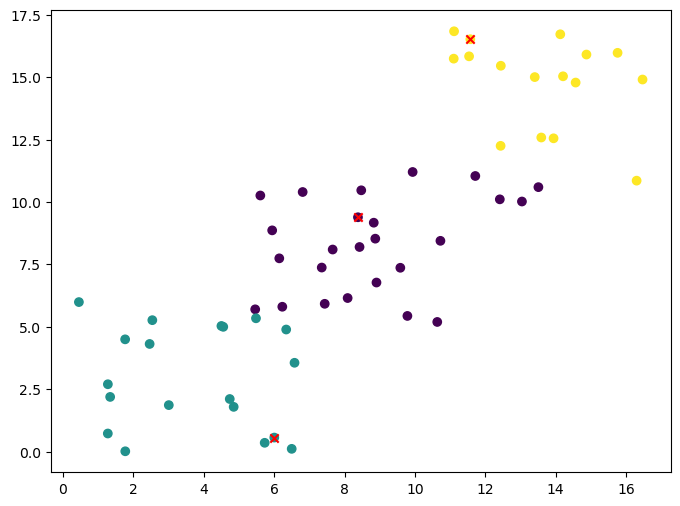

In [50]:
# plot points and centroids
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(loaded_points[:, 0], loaded_points[:, 1], c=assigned_centroids[0], cmap='viridis')
ax.scatter(ini_clusters[:, 0], ini_clusters[:, 1], c='red', marker='x')
plt.show()

### 5. Calculate objective function

In [51]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.float32:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int64
    
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n) and dtype = np.float64

    :return: objective_function_value
    objective_function_value: Objective function value.

    :rtype:
    objective_function_value: float32
    """
    n_points = distances.shape[1]  # Number of points
    objective_function_value = 0.0  # Initialize objective function value

    # Sum distances to assigned centroids
    for i in range(n_points):
        centroid_idx = assigned_centroids[0, i]  # Get assigned centroid
        objective_function_value += distances[centroid_idx, i]  # Add distance

    return np.float32(objective_function_value)  # Convert to float32

In [52]:
# Compute the objective function value
objective_function_value = calculate_objective(assigned_centroids, distances)

# Print the result
print("Objective Function Value:", objective_function_value)

Objective Function Value: 191.69365


### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [53]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32

    :param k_clusters: Number of clusters.
    :type k_clusters: int

    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (k_clusters, 2) and dtype = np.float32
    """
    
    # Initialize array to store new centroids
    new_clusters = np.zeros((k_clusters, 2), dtype=np.float32)
    
    # Initialize array to count points in each cluster
    points_per_cluster = np.zeros(k_clusters)
    
    # Sum up all points belonging to each cluster
    for i in range(points.shape[0]):
        cluster_idx = assigned_centroids[0, i]
        new_clusters[cluster_idx] += points[i]
        points_per_cluster[cluster_idx] += 1
        
    # Compute mean for each cluster by dividing by number of points
    for k in range(k_clusters):
        if points_per_cluster[k] > 0:  # Avoid division by zero
            new_clusters[k] /= points_per_cluster[k]

    return new_clusters  # Don't overwrite with an empty array


In [54]:
new_centroids = calculate_new_centroids(loaded_points, assigned_centroids, k)
print("Updated Centroids:\n", new_centroids)

Updated Centroids:
 [[ 8.799891   8.330453 ]
 [ 3.7467952  2.961032 ]
 [13.590435  14.814852 ]]


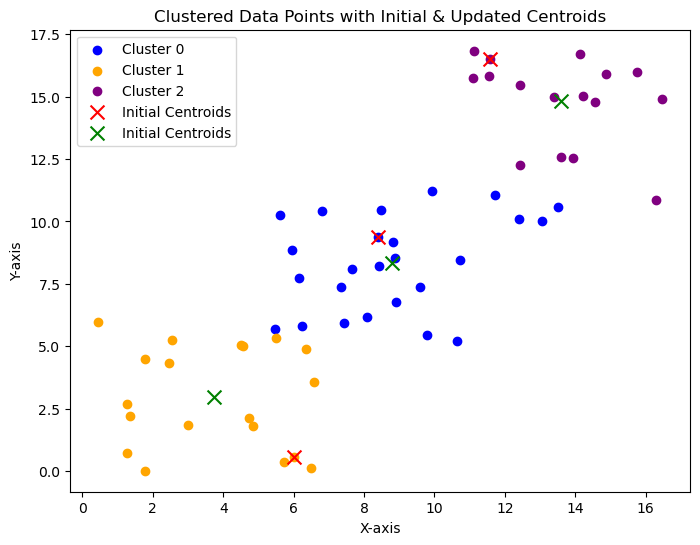

In [55]:
# Define a list of colors for different clusters
colors = ['blue', 'orange', 'purple']

# Compute new centroids
new_centroids = calculate_new_centroids(loaded_points, assigned_centroids, k)

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    cluster_points = loaded_points[assigned_centroids[0] == cluster_id]  # Select points of the cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[cluster_id % len(colors)], label=f"Cluster {cluster_id}")

# Plot initial centroids
plt.scatter(ini_clusters[:, 0], ini_clusters[:, 1], 
            color='red', marker='x', s=100, label="Initial Centroids")

# Plot new centroids
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], 
            color='green', marker='x', s=100, label="Initial Centroids")

# Add labels and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Clustered Data Points with Initial & Updated Centroids")
plt.legend()
plt.show()


###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [56]:
def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_iterations:  Maximum number of iterations
    :type n_of_iterations: int

    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective function

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float
    """

    # Step 1: Initialize centroids randomly
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = np.inf  # Set to a very large value initially

    for iteration in range(n_of_iterations):
        # Step 2: Compute distances from points to centroids
        distances = compute_distances(points, centroid_points)

        # Step 3: Assign points to the nearest centroid
        assigned_centroids = assign_centroids(distances)

        # Step 4: Compute objective function (sum of distances)
        current_objective = calculate_objective(assigned_centroids, distances)

        # Step 5: Check for convergence (if the change is below the error threshold)
        if abs(last_objective - current_objective) < error:
            print(f"Converged after {iteration} iterations.")
            break

        # Step 6: Compute new centroids based on current assignments
        centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)

        # Step 7: Update last objective function value
        last_objective = current_objective

    return centroid_points, last_objective

In [57]:
final_centroids, final_objective = fit(loaded_points, k_clusters=3, n_of_iterations=100)

print("Final Centroids:\n", final_centroids)
print("Final Objective Function Value:", final_objective)

Converged after 7 iterations.
Final Centroids:
 [[ 8.854229  8.461946]
 [ 3.946875  3.226722]
 [13.585644 14.56674 ]]
Final Objective Function Value: 150.01921


Converged after 7 iterations.


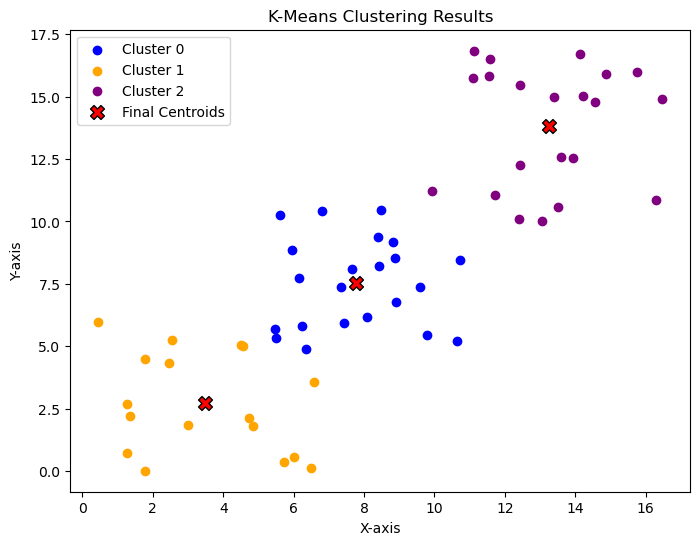

In [58]:
# Run the K-Means clustering algorithm
final_centroids, final_objective = fit(loaded_points, k_clusters=3, n_of_iterations=100)

# Compute distances to the final centroids
distances = compute_distances(loaded_points, final_centroids)

# Assign each point to the closest centroid
assigned_centroids = assign_centroids(distances)

# Define colors for each cluster
colors = ['blue', 'orange', 'purple', 'green', 'cyan', 'pink', 'brown']  # Add more if needed

# Create the plot
plt.figure(figsize=(8, 6))

# Plot points, colored by cluster
for cluster_id in range(3):  # Assuming k=3
    cluster_points = loaded_points[assigned_centroids[0] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[cluster_id % len(colors)], label=f"Cluster {cluster_id}")

# Plot final centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], 
            color='red', marker='X', s=100, edgecolors='black', label="Final Centroids")

# Add labels and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()


# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids *k* as an input, and it is not usually that obvious. Some methods exist to choose the correct number of centroids at the beginning. In this part of the lecture, we will describe two methods to select the right *k* value: *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

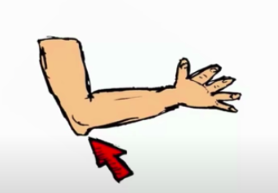 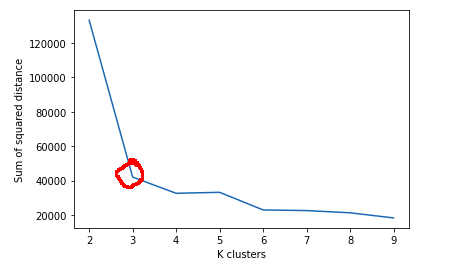

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

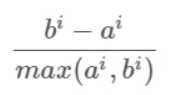

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple, 
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

In [59]:
k_all = range(2, 10)
all_objective = []


#WRITE YOUR CODE HERE
# Iterate through different k values
for k in k_all:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(loaded_points)
    
    # Save the objective function value (inertia)
    all_objective.append(kmeans.inertia_)


c:\Users\guigu\anaconda3\envs\isep\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\guigu\anaconda3\envs\isep\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\guigu\anaconda3\envs\isep\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\guigu\anaconda3\envs\isep\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans 

Text(0, 0.5, 'Sum of squared distance')

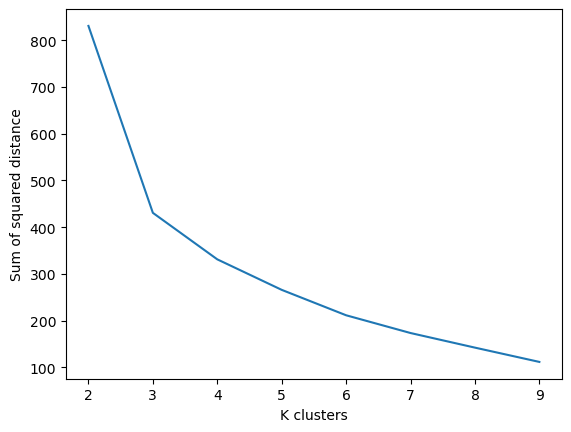

In [60]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

   1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
   2. Initialize the K_means algorithm, where K would be equal to the number of colours in the compressed image
   3. check cluster centroids and convert them to integers - these are your new colours (kmeans.cluster_centers_ could be useful)
   4. replace your 2D array colors with newly generated colors
   5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image. For debugging purposes, you can use a custom smaller image
- the implementation can be done in a single function

In [61]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

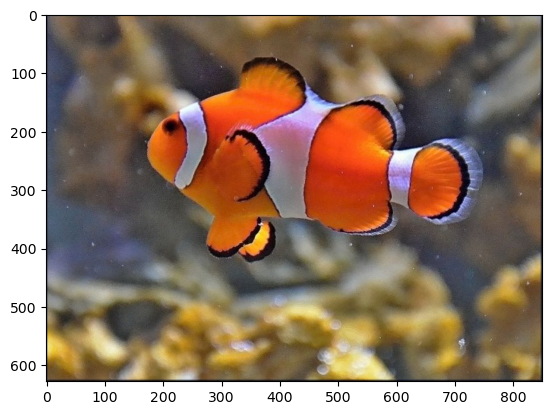

In [62]:
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [63]:
def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.
    
    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array 
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    # 1. Reshape image to 2D array (width*height, color_channels)
    pixels = image.reshape(-1, 3)  # 3 for RGB channels
    
    # 2. Initialize and fit K-means
    kmeans = KMeans(n_clusters=number_of_colours, random_state=42)
    kmeans.fit(pixels)
    
    # 3. Get cluster centers (new colors) and convert to integers
    new_colors = kmeans.cluster_centers_.astype(int)
    
    # 4. Replace original colors with cluster colors
    compressed_pixels = new_colors[kmeans.labels_]
    
    # 5. Reshape back to original image shape
    compressed_image = compressed_pixels.reshape(image.shape)
    
    # Ensure output is in uint8 format for image display
    compressed_image = compressed_image.astype(np.uint8)
    
    return compressed_image
    return image


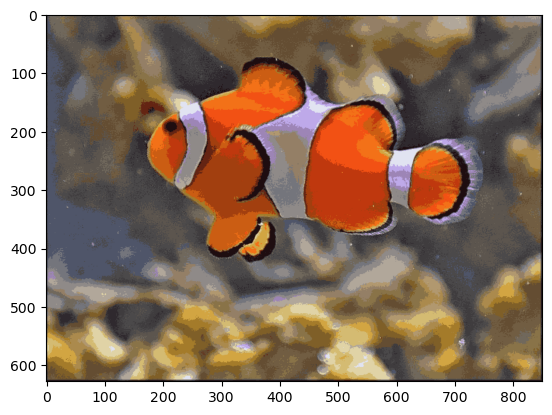

In [64]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()